# 1. Global Earthquakes

In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [3]:
#读取数据
erda=pd.read_csv("usgs_earthquakes.csv")
erda

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [23]:
#按照mag排序后，选择前50的数据并重新排序
erda_50=erda.sort_values('mag',ascending=False).iloc[0:50].reset_index(drop=True)


In [38]:
time=erda_50["time"]
latitude=erda_50["latitude"]
longitude=erda_50["longitude"]
mag=erda_50["mag"]

In [8]:
mag_max=mag.max()
mag_min=mag.min()

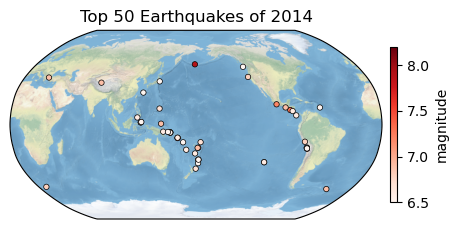

In [37]:
#建立绘图面板

plt.figure(figsize=(5,5), dpi=100)
#确定投影的类型
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
#绘图
ax.scatter(longitude,latitude,c=mag,transform=ccrs.PlateCarree(),vmin= mag_min, vmax= mag_max , cmap='Reds', marker='o',edgecolors='k',s=15, linewidths=0.5)
#绘制颜色标签
cb=ax.figure.colorbar(ax.collections[0],fraction=0.02, pad=0.02,label = 'magnitude') 
#标题
ax.set_title('Top 50 Earthquakes of 2014')
plt.show()